# Cross Validation Techniques
- A terrible approach is to use all available data to train the model and then test the model using the same data

#### Train Test Split
- Holdout cross validation method involves removing a certain portion of data and using it as test data.
- The machine learning model is trained on the training data and then asked to predict the output on the test data


#### Example # 01

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.arange(1,101)
# X_train, X_test = train_test_split(X, test_size = 0.2, shuffle = False)
X_train, X_test = train_test_split(X, test_size = 0.2, shuffle = True)
print("Available Data: \n", X)
print("\nTraining Data: \n", X_train)
print("Test Data: \n", X_test)

Available Data: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Training Data: 
 [ 10  28  94   7  83  61  16  30  13  34  69  87  14 100  75  93  81  99
  17  73   1  42  44  58  21  35  15  11  80  27  92  64  29  59  47   6
  45  79  49  18  36  70  50  19  43  85  24  97  90   4  65  98   5  51
  60  37  62  55  66  41  20  88  52  25  89  86  74  12  95  63  77  48
   2  96  56  78   9   3  57  76]
Test Data: 
 [67 38 33 71 54 68 26 72 91 53 82 84 39 40 46 31  8 23 32 22]


#### Exmaple # 02

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv("datasets/advertising4D.csv")
X = df.drop('sales', axis = 1)
y = df['sales']
# X
# y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
lr = LinearRegression().fit(X_train, y_train)
r2 = r2_score(y_test, lr.predict(X_test))
r2 = lr.score(X_test, y_test)
print("R2 Score: ", r2)

R2 Score:  0.9164411581176639


#### Limitations of Train-Test Split
- We are evaluating our model on only 20% of the data, rather we should evaluate our model on remaining 80% of the data as well
- Suppose you have a sample of 1000 students out of 10 million students of Pakistan. Out of 10 million students of Pakistan, the accuracy that you are getting after evaluating just 200 students might not be a true representation of the accuracy of the entire population. So even after a train-test-split, your model may overfit.
- So we want some thing more robust, let us move on to KFold Cross Validation


### K-fold Cross Validation
- ***Instead of splitting data into single train test split, the data is repeatedly split into multiple train test split and then the model is trained and evaluated on those multiple sets***

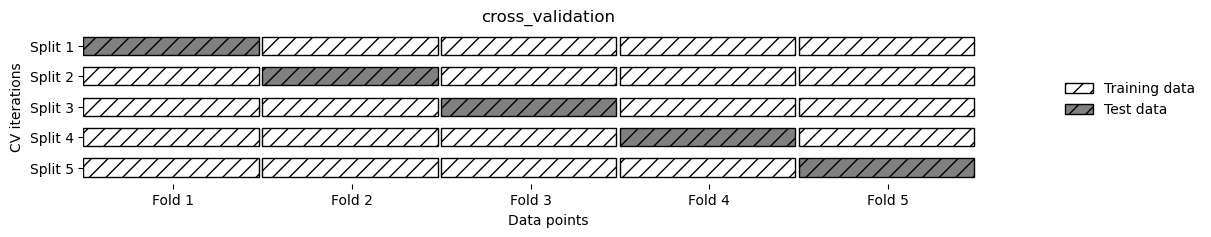

In [11]:
import sys
!{sys.executable} -m pip install mglearn graphviz -q
import mglearn
mglearn.plots.plot_cross_validation()

- Split dataset into k-consecutive folds (without shuffling bydefault)
- Each fold is then used once as a validation while the k-1 remaining folds from the training set

#### Example # 03

In [12]:
from sklearn.model_selection import KFold

X=[0,1,2,3,4,5,6,7,8,9]

# kf = KFold(n_splits = 5, shuffle = False)
kf = KFold(n_splits = 5, shuffle = True)

# split() method returns a generator object containing indices to split data into data and indices
for training_indices, testing_indices in kf.split(X):
    print(training_indices, testing_indices)

[1 2 3 4 5 7 8 9] [0 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 3 4 5 6 7 8 9] [1 2]
[0 1 2 3 4 6 7 8] [5 9]


### Example # 04

***Typical Steps of KFold Cross Validation***
1) The number of folds is defined, by default is this 5
2) The dataset is split up according to these folds, when each fold has a unique set of testing data
3) A model is trained and tested for each fold
4) Each fold returns a metric/s for its test data
5) The mean of these metrics can be calculated to provide a single metric for the process

In [13]:
df = pd.read_csv("datasets/advertising4D.csv")

X = df.drop('sales', axis=1)
y = df['sales']
kf = KFold(n_splits = 5, shuffle = False)
i = 1;
for train_indices, test_indices in kf.split(X,y):
    print("\n Split{}".format(i))
    print("Test Indices: ", test_indices)
    print("Train Indices: ", train_indices)


 Split1
Test Indices:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Train Indices:  [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

 Split1
Test Indices:  [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Train Indices:  [  0   1   2   3   4   5

***Calculate R2 Score for Linear Regression on all these five splits (Manually)***

In [14]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [15]:
from sklearn.linear_model import LinearRegression
X = df.drop('sales', axis=1)
y = df['sales']
kf = KFold(n_splits=5, shuffle=False)
scores_list = []
for train_indices, test_indices in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.loc[train_indices], X.loc[test_indices], y.loc[train_indices], y.loc[test_indices]
    scores_list.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))
scores_list
print("Score List: ", scores_list)
print("Mean R2 Score: ", np.mean(scores_list))

Score List:  [0.8786519804831341, 0.9176321165614462, 0.9293303235799653, 0.8144390391722335, 0.8954782879224388]
Mean R2 Score:  0.8871063495438436


***Calculate R2 Score for Linear Regression Model on all the five splits (cross_val_score)***
- ***cross_val_score*** method is used to evaluate a model by cross validation
- Where
    - estimator is the instance of machine learning model
    - X is an array of shape (n_samples, n_features) on which the model is to be trained
    - y is an array of shape (n_samples,), which is the target variable
    - cv can be an integer value specifying the number of folds for KFold. Default is 5-fold cross
       validation. You can also mention the cross-validation generator that determines the cross-validation
       splitting strategy
     - scoring default value is None, in which case it uses the model's default scoring metric. But this can
       be overridden in the scoring parameter by passing a single string. You can pass a string specifying the
       metric of your choice like 'r2', 'max_error', 'neg_root_mean_squared_error',...
- The return value is an array of scores of the estimator for each run of the cross validation

In [16]:
from sklearn.model_selection import cross_val_score
df = pd.read_csv("datasets/advertising4D.csv")
X = df.drop('sales', axis=1)
y = df['sales']
scores_array = cross_val_score(LinearRegression(), X, y, cv = 5)
print("R2 Score: ", scores_array)
print("Mean R2 Score: ", np.mean(scores_array))

R2 Score:  [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Mean R2 Score:  0.8871063495438436


### Calculate R2 score for Linear Regression Model on all five splits (cross_validate)
- The cross_validate() differs from the cross_val_score in 2 ways
   1) It allows specifying multiple scoring metrics for evaluation
   2) It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in 
       addition to the test score 
- ***cross_val_score(estimator, X, y=None, cv=None, scoring=None, return_train_score=True, return_estimator=True)***
- Where
    - estimator is the instance of machine learning model
    - X is an array of shape (n_samples, n_features) on which the model is to be trained
    - y is an array of shape (n_samples,), which is the target variable
    - cv can be an integer value specifying the number of folds for KFold. Default is 5-fold cross
       validation. You can also mention the cross-validation generator that determines the cross-validation
       splitting strategy
     - scoring default value is None, in which case it uses the model's default scoring metric. But this can
       be overridden in the scoring parameter by specifying a single string or list of strings of your choice like
       'r2', 'max_error', 'neg_root_mean_squared_error',...
      - return_train_score=False , can set it to True to include the train scores as well
      - return_estimator=False , can set it to True to return the estimator fitted on each split
- The return value is a dictionary of arrays containing the score/time arrays for each scorer. The possible keys of the dictionary are test_score, train_score, fit_time, score_time, estimator


In [17]:
from sklearn.model_selection import cross_validate
df = pd.read_csv("datasets/advertising4D.csv")
X = df.drop('sales', axis=1)
y = df['sales']
result_dict = cross_validate(LinearRegression(), X, y, cv = 5, return_train_score = True, return_estimator = True)
print(result_dict)

{'fit_time': array([0.00897431, 0.00698161, 0.00299168, 0.00498939, 0.00299168]), 'score_time': array([0.0039897 , 0.00299215, 0.00199461, 0.00199461, 0.00250745]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.87865198, 0.91763212, 0.92933032, 0.81443904, 0.89547829]), 'train_score': array([0.90101302, 0.89039598, 0.88969316, 0.91458801, 0.89615232])}


#### The Scoring argument of the cross_validate() method
- By default cross_val_score() and cross_validate() methods uses the chosen model’s default scoring metric, but this can be overridden by specifying the scoring metric in the scoring parameter.
- For cross_Val_score() this can be a single scoring metric, while for cross_validate() you can pass either a single metric or multiple as a list to the scoring argument.

In [18]:
from sklearn.model_selection import cross_validate
df = pd.read_csv("datasets/advertising4D.csv")
X = df.drop('sales', axis=1)
y = df['sales']
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=False)
result_dict = cross_validate(lr, X, y, cv=kf, scoring=['r2', 'neg_mean_absolute_error'])
pd.DataFrame(result_dict)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error
0,0.009972,0.005985,0.878652,-1.365488
1,0.002994,0.002992,0.917632,-1.292532
2,0.002992,0.001994,0.929330,-0.947893
3,0.005992,0.002992,0.814439,-1.631537
4,0.003993,0.002989,0.895478,-1.287718


## Entension to K-fold Cross validation (Stratified k-fold cross validation)
- The standard k-fold cross validation works perfectly fine for all regression tasks, however for regression tasks, it is better to use stratefied k-fold cross validation
- For classification problems, standard k-fold cross validation may not work as expected for an imbalanced dataset or for a dataset having sorted class labels.
- So, when we have an imbalanced dataset, we need a slight change to the k-fold cross validation techniques, such that each fold contains approximately the same statra of samples for each output class as the complete.
- This variation of using a stratum in k-fold cross validation is known as k-fold cross validation

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = df.drop('target', axis = 1)
y = df['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


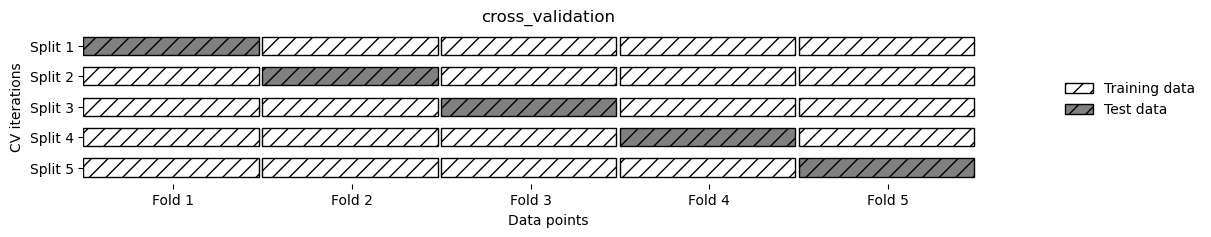

In [18]:
import mglearn
mglearn.plots.plot_cross_validation()

#### Use kfold on the iris Dataset(Manually)

In [21]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

kf = KFold(n_splits = 3, shuffle = False)
score_list = []
for train_indices, test_indices in kf.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_indices], X.loc[test_indices], y.loc[train_indices], y.loc[test_indices]
    score_list.append(get_score(LogisticRegression(solver='liblinear'), X_train, X_test, y_train, y_test))
print("Score List: ", scores_list)

Score List:  [0.8786519804831341, 0.9176321165614462, 0.9293303235799653, 0.8144390391722335, 0.8954782879224388]


#### Use Kold on iris Dataset ( cross_val_score )

In [25]:
kf = KFold(n_splits=3, shuffle=False) # set shuffle to True and see the results
scores_array = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=kf)
print("R2 Scores: ", scores_array)

R2 Scores:  [0. 0. 0.]


In [26]:
# For regression estimator, if cv argument is set to an integer value the cross_
# KFold by default with shuffle argument set to True
scores_array = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=3)
print("R2 Scores: ", scores_array)

R2 Scores:  [0.96 0.96 0.94]


#### Use StratifiedKFold on iris Dataset (Mannually)

In [27]:
skf = StratifiedKFold(n_splits=3, shuffle=False)
scores_list=[]
for train_indices, test_indices in skf.split(X, y):
 X_train,X_test,y_train,y_test = X.loc[train_indices], X.loc[test_indices], y.loc[train_indices], y.loc[test_indices]
 scores_list.append(get_score(LogisticRegression(solver='liblinear'), X_train, X_test, y_train, y_test))
print("R2 Scores: ", scores_list)

R2 Scores:  [0.96, 0.96, 0.94]


#### Use StratifiedKFold on iris Dataset ( cross_val_score )

In [28]:
skf = StratifiedKFold(n_splits=3, shuffle=False)
scores_array = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=skf)
print("R2 Scores: ", scores_array)

R2 Scores:  [0.96 0.96 0.94]


In [29]:
# For classification estimator, if cv argument is set to an integer value the cr
# StratifiedKFold by default with shuffle argument set to True
scores_array = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=3)
print("R2 Scores: ", scores_array)

R2 Scores:  [0.96 0.96 0.94]
